<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/notebooks/DLP/Telecon_customer_churn_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3690047211.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df['TotalCharges'],errors='coerce').isnull().sum()

np.int64(11)

In [9]:
df1=df[df.TotalCharges!=' ']
df1.shape,df.shape

((7032, 20), (7043, 20))

In [10]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipython-input-695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
df1.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


In [13]:
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
tenure_churn_no=df1[df1.Churn=='No'].tenure

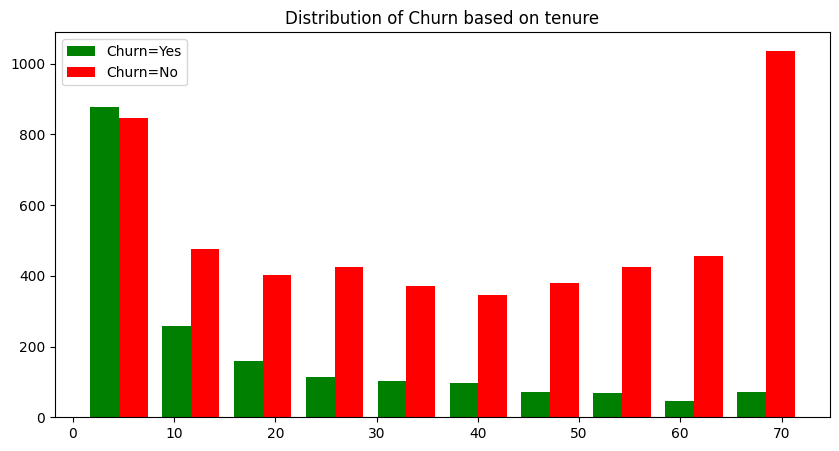

In [14]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Churn based on tenure')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
#

In [15]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,MinMaxScaler
scaller=MinMaxScaler()
lbin=LabelBinarizer()
lbe=LabelEncoder()

In [16]:
from enum import unique
def preprocessing(dataf):
  for colums in dataf:
    if dataf[colums].dtype=='object' and len(dataf[colums].unique())==2:
      dataf[colums]=lbin.fit_transform(dataf[colums])
    elif dataf[colums].dtype=='object' and len(dataf[colums].unique())!=2:
      dataf[colums]=lbe.fit_transform(dataf[colums])
    else:
      pass
  return dataf

In [17]:
preprocessing(df1)

/tmp/ipython-input-1020316200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[colums]=lbin.fit_transform(dataf[colums])
/tmp/ipython-input-1020316200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[colums]=lbin.fit_transform(dataf[colums])
/tmp/ipython-input-1020316200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [18]:
df1.tenure=scaller.fit_transform(df1[['tenure']])
df1.MonthlyCharges=scaller.fit_transform(df1[['MonthlyCharges']])
df1.TotalCharges=scaller.fit_transform(df1[['TotalCharges']])

/tmp/ipython-input-971260880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.tenure=scaller.fit_transform(df1[['tenure']])
/tmp/ipython-input-971260880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.MonthlyCharges=scaller.fit_transform(df1[['MonthlyCharges']])
/tmp/ipython-input-971260880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [19]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [20]:
X=df1.drop('Churn',axis=1)
Y=df1['Churn']

In [21]:
Y.value_counts()

,count
Churn,
0,5163
1,1869


In [22]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)

In [23]:
X_balanced,Y_balanced=smote.fit_resample(X,Y)

In [24]:
Y_balanced.value_counts()

,count
Churn,
0,5163
1,5163


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X_balanced,Y_balanced,test_size=0.2,random_state=42)

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [29]:
len(X_train.columns)

19

In [51]:
model=keras.Sequential(
    [
        keras.layers.Dense(20,input_shape=(19,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8124 - loss: 0.4094
Epoch 2/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8086 - loss: 0.4255
Epoch 3/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8146 - loss: 0.4018
Epoch 4/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8026 - loss: 0.4250
Epoch 5/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8063 - loss: 0.4119
Epoch 6/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8150 - loss: 0.4081
Epoch 7/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8067 - loss: 0.4131
Epoch 8/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8006 - loss: 0.4268
Epoch 9/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8100 - loss: 0.4076
Epoch 10/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8129 - loss: 0.4089
Epoch 11/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8085 - loss: 0.4103
Epoch 12/100
1033/1

In [38]:
model.evaluate(X_test,Y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4502


[0.4517800807952881, 0.7875121235847473]

In [40]:
yp=model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
Y_pred=[]
for element in yp:
  if element>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1037
           1       0.79      0.79      0.79      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



<Axes: >

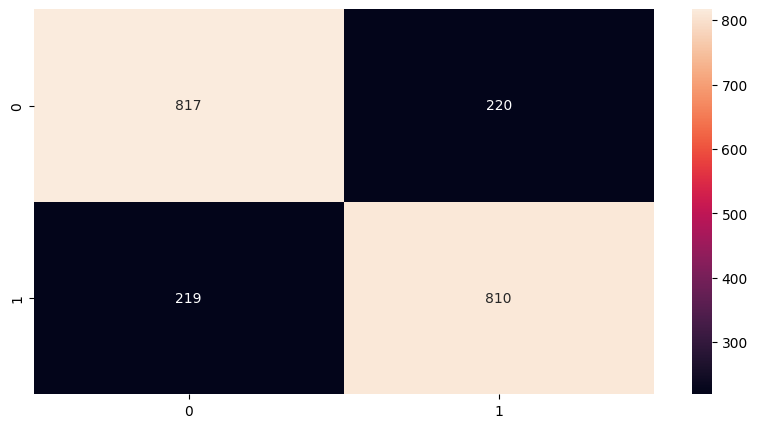

In [47]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')